In [1]:
import pyreadr

result = pyreadr.read_r('/path/to/file.RData') # also works for Rds

# done! let's see what we got
# result is a dictionary where keys are the name of objects and the values python
# objects
print(result.keys()) # let's check what objects we got
df1 = result["df1"] # extract the pandas data frame for object df1

PyreadrError: File b'/path/to/file.RData' does not exist!

In [5]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import numpy as np
import pandas as pd
from scipy import stats, sparse
import bottleneck
from scipy.stats import mannwhitneyu
import h5py
import h5py
import logging
import numpy as np
import pandas as pd
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
from scipy.sparse import csr_matrix, dia_matrix, triu, tril, coo_matrix
import scipy.stats as stats
import os.path
import gc
import os
import h5py
import scipy.sparse as ss
import os
import sys
import numpy as np
import pandas as pd
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
from scipy.sparse import csr_matrix, dia_matrix, triu, tril, coo_matrix
import pyranges as pr

INFO:numexpr.utils:Note: detected 192 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 192 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [6]:
species="human"
SRP_name='aggregates'
resolution='1kbp_raw'
resolution_human=1000

In [35]:

    # as PyRanges-object
    gr = pr.read_gtf('/grid/gillis/data/lohia/hi_c_data_processing/genomes_jlee/gencode.v28.chr_patch_hapl_scaff.annotation.gtf.gz')
    df = gr.df
    gene_data = df[df['Feature'] == 'gene']
    gene_data['gene_id'] = [x.split('.')[0] for x in gene_data['gene_id']]
    gene_data['gene_id'].drop_duplicates(inplace=True)


<ipython-input-35-1ddefe0783b1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_data['gene_id'] = [x.split('.')[0] for x in gene_data['gene_id']]
<ipython-input-35-1ddefe0783b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_data['gene_id'].drop_duplicates(inplace=True)


In [36]:
    if species != 'human':
        gene_data['Chromosome'] = ['chr'+x for x in gene_data['Chromosome']]
        


In [50]:
chr_list = ['chr'+str(x) for x in list(range(1,23))]

In [51]:
    new = gene_data["Chromosome"].isin(chr_list)
  

    gene_data = gene_data[new]

In [53]:
import re

In [62]:
gene_data['chrn'] = [int(re.findall(r'[0-9]+', x)[0]) for x in gene_data["Chromosome"]]

In [64]:
gene_data = gene_data.sort_values(by=['chrn', 'Start'])

In [77]:
gene_data

Chromosome   Source Feature     Start       End Score Strand Frame  \
245689        chr1   HAVANA    gene     11868     14409     .      +     .   
375058        chr1   HAVANA    gene     14403     29570     .      -     .   
375071        chr1  ENSEMBL    gene     17368     17436     .      -     .   
245701        chr1   HAVANA    gene     29553     31109     .      +     .   
245709        chr1  ENSEMBL    gene     30365     30503     .      +     .   
...            ...      ...     ...       ...       ...   ...    ...   ...   
2815932      chr22   HAVANA    gene  50738195  50745334     .      +     .   
2842878      chr22   HAVANA    gene  50740592  50743520     .      -     .   
2842882      chr22   HAVANA    gene  50754674  50755434     .      -     .   
2815968      chr22   HAVANA    gene  50756947  50801309     .      +     .   
2842885      chr22   HAVANA    gene  50767500  50783663     .      -     .   

                 gene_id                           gene_type  ...  \
245689   ENSG00000223972  transcribed_unprocessed_pseudogene  ...   
375058   ENSG00000227232              unprocessed_pseudogene  ...   
375071   ENSG00000278267                               miRNA  ...   
245701   ENSG00000243485                             lincRNA  ...   
245709   ENSG00000284332                               miRNA  ...   
...                  ...                                 ...  ...   
2815932  ENSG00000100312                      protein_coding  ...   
2842878  ENSG00000254499                           antisense  ...   
2842882  ENSG00000213683                processed_pseudogene  ...   
2815968  ENSG00000184319  transcribed_unprocessed_pseudogene  ...   
2842885  ENSG00000079974                      protein_coding  ...   

        transcript_name transcript_support_level             tag  \
245689              NaN                      NaN             NaN   
375058              NaN                      NaN             NaN   
375071              NaN                      NaN             NaN   
245701              NaN                      NaN      ncRNA_host   
245709              NaN                      NaN             NaN   
...                 ...                      ...             ...   
2815932             NaN                      NaN             NaN   
2842878             NaN                      NaN             NaN   
2842882             NaN                      NaN  pseudo_consens   
2815968             NaN                      NaN  pseudo_consens   
2842885             NaN                      NaN             NaN   

        havana_transcript exon_number exon_id  ont protein_id ccdsid chrn  
245689                NaN         NaN     NaN  NaN        NaN    NaN    1  
375058                NaN         NaN     NaN  NaN        NaN    NaN    1  
375071                NaN         NaN     NaN  NaN        NaN    NaN    1  
245701                NaN         NaN     NaN  NaN        NaN    NaN    1  
245709                NaN         NaN     NaN  NaN        NaN    NaN    1  
...                   ...         ...     ...  ...        ...    ...  ...  
2815932               NaN         NaN     NaN  NaN        NaN    NaN   22  
2842878               NaN         NaN     NaN  NaN        NaN    NaN   22  
2842882               NaN         NaN     NaN  NaN        NaN    NaN   22  
2815968               NaN         NaN     NaN  NaN        NaN    NaN   22  
2842885               NaN         NaN     NaN  NaN        NaN    NaN   22  

[55411 rows x 25 columns]

In [272]:
gene_data[gene_data['gene_name'] == 'IFT27']

Chromosome  Source Feature     Start       End Score Strand Frame  \
2831606      chr22  HAVANA    gene  36758201  36776256     .      -     .   

                 gene_id       gene_type  ... transcript_name  \
2831606  ENSG00000100360  protein_coding  ...             NaN   

        transcript_support_level  tag havana_transcript exon_number exon_id  \
2831606                      NaN  NaN               NaN         NaN     NaN   

         ont protein_id ccdsid chrn  
2831606  NaN        NaN    NaN   22  

[1 rows x 25 columns]

In [78]:
gene_data[['Chromosome', 'Start', 'End', 'gene_type', 'gene_id']].to_csv('./human_genes.csv', sep='\t', header=False, index=False)

In [79]:
        input_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/'
        bins_bed = pd.read_csv(f'{input_path}/all_bins.bed', names=['chr', 'start', 'end', 'bin_id'])

In [81]:
bins_bed['bin_id'] = bins_bed.index

In [87]:
bins_bed[['chr', 'start', 'end', 'bin_id']].to_csv('./human_bins_bed.csv', sep='\t', header=False, index=False)

In [101]:
bins_bed_overlap = pd.read_csv('./bin_overlap_1KB_with_distbp.csv', sep='\t',names=['chrom', 'start', 'end', 'bin_id','chromg', 'startg', 'endg', 'gene_type', 'gene_id', 'dist' ])


In [102]:
bins_bed_overlap

chrom     start       end   bin_id chromg    startg      endg  \
0         chr1         0      1000        0   chr1     11868     14409   
1         chr1      1000      2000        1   chr1     11868     14409   
2         chr1      2000      3000        2   chr1     11868     14409   
3         chr1      3000      4000        3   chr1     11868     14409   
4         chr1      4000      5000        4   chr1     11868     14409   
...        ...       ...       ...      ...    ...       ...       ...   
2875007  chr22  50814000  50815000  2875007  chr22  50756947  50801309   
2875008  chr22  50815000  50816000  2875008  chr22  50756947  50801309   
2875009  chr22  50816000  50817000  2875009  chr22  50756947  50801309   
2875010  chr22  50817000  50818000  2875010  chr22  50756947  50801309   
2875011  chr22  50818000  50818468  2875011  chr22  50756947  50801309   

                                  gene_type          gene_id   dist  
0        transcribed_unprocessed_pseudogene  ENSG00000223972  10869  
1        transcribed_unprocessed_pseudogene  ENSG00000223972   9869  
2        transcribed_unprocessed_pseudogene  ENSG00000223972   8869  
3        transcribed_unprocessed_pseudogene  ENSG00000223972   7869  
4        transcribed_unprocessed_pseudogene  ENSG00000223972   6869  
...                                     ...              ...    ...  
2875007  transcribed_unprocessed_pseudogene  ENSG00000184319  12692  
2875008  transcribed_unprocessed_pseudogene  ENSG00000184319  13692  
2875009  transcribed_unprocessed_pseudogene  ENSG00000184319  14692  
2875010  transcribed_unprocessed_pseudogene  ENSG00000184319  15692  
2875011  transcribed_unprocessed_pseudogene  ENSG00000184319  16692  

[2875012 rows x 10 columns]

In [221]:

file_path = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/'
file_name = f'{resolution}/max/contact_top1/totg_reg_prior_only_top1_inter.csv'
df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')

In [222]:
df2 = df2.merge(bins_bed_overlap)

In [112]:
df2['log_dist'] = [np.log(x) for x in df2['dist']]

<ipython-input-112-21819dc93d7f>:1: RuntimeWarning: divide by zero encountered in log
  df2['log_dist'] = [np.log(x) for x in df2['dist']]


In [223]:
df2

finite_bin  prior_val   bin_id  chrom     start       end chromg  \
0             20980   0.000095        0   chr1         0      1000   chr1   
1             20980   0.000048        1   chr1      1000      2000   chr1   
2             20980   0.000095        2   chr1      2000      3000   chr1   
3             20980   0.000238        3   chr1      3000      4000   chr1   
4             20980   0.000000        4   chr1      4000      5000   chr1   
...             ...        ...      ...    ...       ...       ...    ...   
2875007       22863   0.000131  2875007  chr22  50814000  50815000  chr22   
2875008       22863   0.000175  2875008  chr22  50815000  50816000  chr22   
2875009       22863   0.000000  2875009  chr22  50816000  50817000  chr22   
2875010       22863   0.000219  2875010  chr22  50817000  50818000  chr22   
2875011       22863   0.000175  2875011  chr22  50818000  50818468  chr22   

           startg      endg                           gene_type  \
0           11868     14409  transcribed_unprocessed_pseudogene   
1           11868     14409  transcribed_unprocessed_pseudogene   
2           11868     14409  transcribed_unprocessed_pseudogene   
3           11868     14409  transcribed_unprocessed_pseudogene   
4           11868     14409  transcribed_unprocessed_pseudogene   
...           ...       ...                                 ...   
2875007  50756947  50801309  transcribed_unprocessed_pseudogene   
2875008  50756947  50801309  transcribed_unprocessed_pseudogene   
2875009  50756947  50801309  transcribed_unprocessed_pseudogene   
2875010  50756947  50801309  transcribed_unprocessed_pseudogene   
2875011  50756947  50801309  transcribed_unprocessed_pseudogene   

                 gene_id   dist  
0        ENSG00000223972  10869  
1        ENSG00000223972   9869  
2        ENSG00000223972   8869  
3        ENSG00000223972   7869  
4        ENSG00000223972   6869  
...                  ...    ...  
2875007  ENSG00000184319  12692  
2875008  ENSG00000184319  13692  
2875009  ENSG00000184319  14692  
2875010  ENSG00000184319  15692  
2875011  ENSG00000184319  16692  

[2875012 rows x 12 columns]

In [273]:
df2

finite_bin  prior_val   bin_id  chrom     start       end chromg  \
0             20980   0.000095        0   chr1         0      1000   chr1   
1             20980   0.000048        1   chr1      1000      2000   chr1   
2             20980   0.000095        2   chr1      2000      3000   chr1   
3             20980   0.000238        3   chr1      3000      4000   chr1   
4             20980   0.000000        4   chr1      4000      5000   chr1   
...             ...        ...      ...    ...       ...       ...    ...   
2875007       22863   0.000131  2875007  chr22  50814000  50815000  chr22   
2875008       22863   0.000175  2875008  chr22  50815000  50816000  chr22   
2875009       22863   0.000000  2875009  chr22  50816000  50817000  chr22   
2875010       22863   0.000219  2875010  chr22  50817000  50818000  chr22   
2875011       22863   0.000175  2875011  chr22  50818000  50818468  chr22   

           startg      endg                           gene_type  \
0           11868     14409  transcribed_unprocessed_pseudogene   
1           11868     14409  transcribed_unprocessed_pseudogene   
2           11868     14409  transcribed_unprocessed_pseudogene   
3           11868     14409  transcribed_unprocessed_pseudogene   
4           11868     14409  transcribed_unprocessed_pseudogene   
...           ...       ...                                 ...   
2875007  50756947  50801309  transcribed_unprocessed_pseudogene   
2875008  50756947  50801309  transcribed_unprocessed_pseudogene   
2875009  50756947  50801309  transcribed_unprocessed_pseudogene   
2875010  50756947  50801309  transcribed_unprocessed_pseudogene   
2875011  50756947  50801309  transcribed_unprocessed_pseudogene   

                 gene_id   dist quintile_df2_u_gene_deprior  
0        ENSG00000223972  10869                           8  
1        ENSG00000223972   9869                          35  
2        ENSG00000223972   8869                          36  
3        ENSG00000223972   7869                          18  
4        ENSG00000223972   6869                          47  
...                  ...    ...                         ...  
2875007  ENSG00000184319  12692                         NaN  
2875008  ENSG00000184319  13692                         NaN  
2875009  ENSG00000184319  14692                         NaN  
2875010  ENSG00000184319  15692                         NaN  
2875011  ENSG00000184319  16692                         NaN  

[2875012 rows x 13 columns]

<ipython-input-107-bcb56b55a7e6>:1: RuntimeWarning: divide by zero encountered in log
  ax = sns.scatterplot(df2['prior_val'],[np.log(x) for x in df2['dist']])
/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


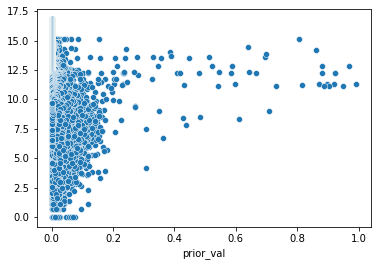

In [107]:
ax = sns.scatterplot(df2['prior_val'],[np.log(x) for x in df2['dist']])

In [146]:

        df2['pos'] = df2['chrom'] + '_' + df2['start'].astype('str')

        if species == 'human':

            df_cre = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/li2022/GRCh38-cCREs.bed', sep='\t', names=['chr', 'start', 'end', 't1', 't2', 't3'])

        else:

            df_cre = pd.read_csv('/grid/gillis/data/lohia/ATAC_Risa/mm10-cCREs.bed', sep='\t', names=['chr', 'start', 'end', 't1', 't2', 't3'])

        df_cre['start_bin'] = df_cre['start']/resolution_human
        df_cre['start_bin'] = df_cre['start_bin'].astype('int')
        df_cre['start_bin'] = df_cre['start_bin']*resolution_human
        df_cre['start_bin'] = df_cre['start_bin'].astype('str')
        df_cre['start_bin'] = df_cre['chr'] + '_' + df_cre['start_bin']
        #df_cre_1kb_encode = df_cre.drop_duplicates(subset=['start_bin'])
        df_cre['cre'] = 1
        df_cre = df_cre.groupby(['start_bin'])['cre'].sum().reset_index()
        df_cre_1kb_encode = df_cre.merge(df2, left_on='start_bin', right_on='pos', how='right')
        df_cre_1kb_encode['cre'] = df_cre_1kb_encode['cre'].fillna(0)

(0.0, 0.025)

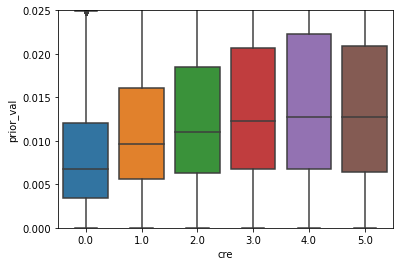

In [161]:
ax = sns.boxplot(data=df_cre_1kb_encode[df_cre_1kb_encode['prior_val']>-1], y='prior_val',x='cre')
ax.set_ylim([0,0.025])

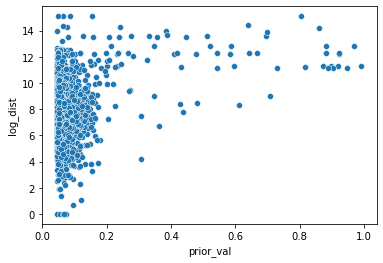

In [137]:
ax = sns.scatterplot(data=df2[df2['prior_val']>.046], x='prior_val',y='log_dist')

In [244]:
df_ensg_name = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/genomes_jlee/ensg_geneid_symbol.csv', sep='\t')[['GeneID', 'Ensembl_gene_identifier', 'Symbol', 'type_of_gene']]



df_ensg_name = df_ensg_name.drop_duplicates(['Ensembl_gene_identifier', 'Symbol'])

df_ensg_name = df_ensg_name.drop_duplicates(['Ensembl_gene_identifier'])
df_ensg_name = df_ensg_name.drop_duplicates(['Symbol'])


df_de_prior = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/mc_predictability/pnas.1802973116.sd02.txt', sep='\t')



df_de_prior = df_ensg_name.merge(df_de_prior, left_on='Symbol', right_on='Gene_Name')

df2_u_gene = df2.groupby(['gene_id'])['prior_val'].max().reset_index()
df2_u_gene =  df2.groupby(['gene_id'])['dist', 'prior_val'].min().reset_index()
df2_u_gene = df2_u_gene[df2_u_gene['dist']==0]

df2_u_gene_deprior = df2_u_gene.merge(df_de_prior, left_on='gene_id', right_on='Ensembl_gene_identifier' )

<ipython-input-244-6fd43416238b>:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2_u_gene =  df2.groupby(['gene_id'])['dist', 'prior_val'].min().reset_index()


<ipython-input-243-55e895be9074>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sns.histplot(df2.groupby(['gene_id'])['dist', 'prior_val'].min().reset_index()['dist'],bins=10)


<AxesSubplot:xlabel='dist', ylabel='Count'>

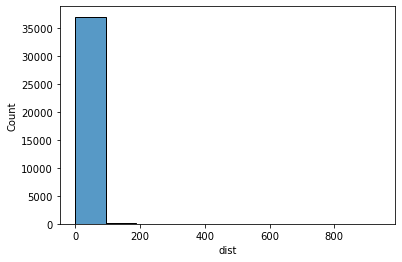

In [243]:
sns.histplot(df2.groupby(['gene_id'])['dist', 'prior_val'].min().reset_index()['dist'],bins=10)

In [246]:
df2_u_gene['dist'].max()

0

In [162]:
import pyBigWig
bw = pyBigWig.open("/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/li2022/241-mammalian-2020v2.bigWig")  # Change me
chrom_list = bins_bed.drop_duplicates(['chr'])['chr'].tolist()
phylop_avg_scores_mean_c = []
for chrom in chrom_list:
    nbins = bins_bed[bins_bed['chr'] == chrom].shape[0]
    bin_end = bins_bed[bins_bed['chr'] == chrom]['end'].max()
    phylop_avg_scores_mean_c.extend(bw.stats(chrom, 0, bin_end, type="max", nBins=nbins))
    
    

In [210]:
import pyBigWig
bw = pyBigWig.open("/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/li2022/241-mammalian-2020v2.bigWig")  # Change me
chrom_list = bins_bed.drop_duplicates(['chr'])['chr'].tolist()
phylop_avg_scores_min_c = []
for chrom in chrom_list:
    nbins = bins_bed[bins_bed['chr'] == chrom].shape[0]
    bin_end = bins_bed[bins_bed['chr'] == chrom]['end'].max()
    phylop_avg_scores_min_c.extend(bw.stats(chrom, 0, bin_end, type="min", nBins=nbins))

In [166]:
df2['phylop'] = phylop_avg_scores_mean_c

In [211]:
df2['phylop_min'] = phylop_avg_scores_min_c

In [217]:
df2['quintile_prior_val'] = pd.qcut(df2['prior_val'] , 50, labels=np.arange(50, 0, -1))

In [179]:
df2['quintile_phylop'] = pd.qcut(df2['phylop'] , 10, labels=np.arange(10, 0, -1))

In [252]:
df2_u_gene_deprior['quintile_df2_u_gene_deprior'] = pd.qcut(df2_u_gene_deprior['prior_val'] , 2, labels=np.arange(2, 0, -1))



In [254]:
df2_u_gene_deprior['quintile_DE_Prior_Rank'] = pd.qcut(df2_u_gene_deprior['DE_Prior_Rank'] , 3, labels=np.arange(3, 0, -1))


In [262]:
df2_u_gene

gene_id  dist  prior_val
0      ENSG00000000419     0   0.002324
1      ENSG00000000457     0   0.002383
2      ENSG00000000460     0   0.000667
3      ENSG00000000938     0   0.004194
4      ENSG00000000971     0   0.000238
...                ...   ...        ...
37423  ENSG00000285492     0   0.001343
37424  ENSG00000285498     0   0.001895
37425  ENSG00000285505     0   0.003012
37426  ENSG00000285509     0   0.001399
37427  ENSG00000285513     0   0.006362

[37042 rows x 3 columns]

In [274]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
auc_GO_terms_manw_three_list_hic_exp = []
for resolution in [100]:
    if species == 'drosophila':
        fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/1kbp_raw/max/inter_only/'
    else:
        fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/{resolution}kbp_raw/max/'
    for fname in ['hic_gene_corr_inter_excluding_intra_nanranked_ind_1_percent_per_chr.csv']:
        
        df = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/gene2go/{species}_gene2go.csv', delim_whitespace=True)

        df['val'] = 1

        go_table = pd.pivot_table(df, index=['NetworkIDs'],columns=['GO_term'])

        go_table = go_table.fillna(0)

        go_table = pd.DataFrame(go_table.values ,  index=go_table.index , columns = [x[1] for x in go_table.columns])


        #df_hic_auc = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/inter_only/hic_gene_KR_inter_10_percent_per_chr_mouse_aggregates.csv', sep='\t')

        #df_hic_auc = pd.read_csv(f'{fpath}/{fname}', sep='\t')
        
        df_hic_auc = df2


        go_df_scores = go_table.merge(df_hic_auc, left_on=go_table.index, right_on='gene_id')
        GO_groups = pd.read_csv('/grid/gillis/home/lohia/notebooks_proj2_marker_v2/goslim_panther.txt', sep=" ", names=["del","go_id"])
        GO_groups_des = pd.read_csv('/grid/gillis/home/lohia/notebooks_proj2_marker_v2/goslim_panther_description.txt', sep=":", names=["del","des"])
        GO_groups_ben = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/genomes_jlee/aug4.GOslim', names=["go_id"])
        GO_groups_type = pd.read_csv('/grid/gillis/home/lohia/notebooks_proj2_marker_v2/goslim_panther_process.txt', sep=" ", names=["del","type"])




        from scipy.stats import mannwhitneyu
        import scipy.stats as stats
        z_list = []
        z_p_dict = []
        des_list = []
        for go_id in GO_groups["go_id"].tolist():
            
         if go_id in GO_groups_ben["go_id"].tolist():

            try:

                    t_p_scores = go_df_scores[go_df_scores[go_id] ==1 ]['prior_val'].tolist()

                    t_n_scores = go_df_scores[go_df_scores[go_id] ==0 ]['prior_val'].tolist()
                


                    U1, p_val = mannwhitneyu(t_p_scores, t_n_scores, use_continuity=False, alternative='greater')
                    #nx, ny = len(t_p_scores), len(t_n_scores)
                    #N = nx + ny
                    #z = (U1 - nx*ny/2) / np.sqrt(nx*ny * (N + 1)/ 12)
                    #p = stats.norm.sf(z)
                    z_list.append(U1)
                    z_p_dict.append(p_val)

                    #print (p, p_val)
            except:
                print (go_id)
                z_list.append(np.nan)
                z_p_dict.append(np.nan)


        auc_GO_terms_manw = pd.DataFrame(list(zip(GO_groups["go_id"].tolist(),  z_p_dict , z_list, GO_groups_des['des'].tolist(), GO_groups_type['type'].tolist())), columns=['id', 'P_val_agg', 'U1_stat', 'des', 'type'])
        auc_GO_terms_manw['species'] = species
        auc_GO_terms_manw.dropna(subset=['P_val_agg'], inplace=True)
        p_val_adjusted = sm.stats.multipletests(auc_GO_terms_manw['P_val_agg'].values, method='fdr_bh')
        auc_GO_terms_manw['adjusted_P_val_agg'] = p_val_adjusted[1]
        auc_GO_terms_manw.to_csv(f'{fpath}/GO_{fname}', sep='\t', index=False)
        auc_GO_terms_manw_three_list_hic_exp.append(auc_GO_terms_manw)


GO:0005618
GO:0009536
GO:0009579
GO:0015979


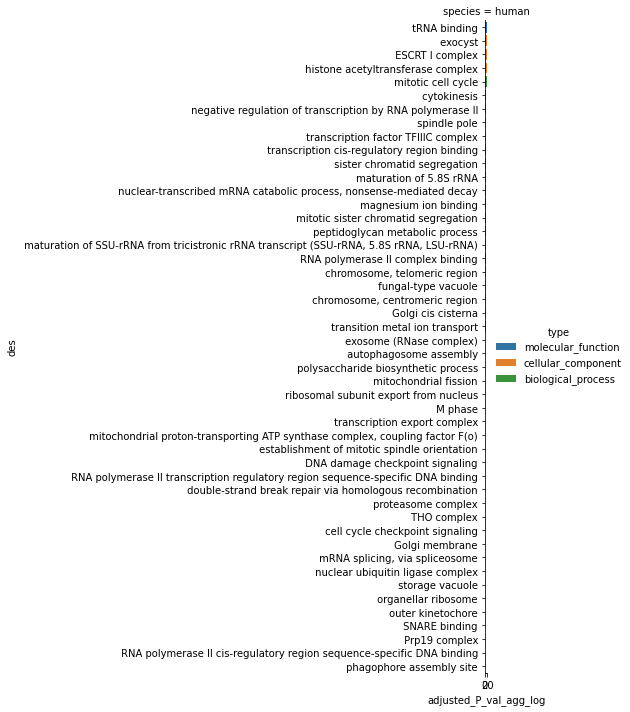

In [264]:
    df_whole = auc_GO_terms_manw_three_list_hic_exp[0]
    df_whole['adjusted_P_val_agg_log'] = [-1*np.log10(x) for x in df_whole['adjusted_P_val_agg']]

    sns.catplot(data=df_whole[df_whole['adjusted_P_val_agg'] <= 0.05].sort_values(['adjusted_P_val_agg']), y='des', x='adjusted_P_val_agg_log', height=10, aspect=8/9.5, kind='bar', dodge=False, col='species', hue='type')
    

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


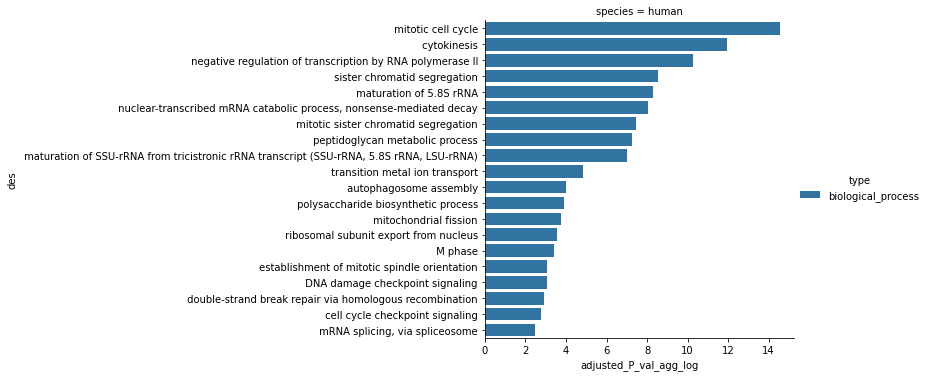

In [267]:
    df_whole = auc_GO_terms_manw_three_list_hic_exp[0]
    df_whole['adjusted_P_val_agg_log'] = [-1*np.log10(x) for x in df_whole['adjusted_P_val_agg']]

    sns.catplot(data=df_whole[(df_whole['adjusted_P_val_agg'] <= 0.05) & (df_whole['type'] == 'biological_process') ].sort_values(['adjusted_P_val_agg']), y='des', x='adjusted_P_val_agg_log', kind='bar', dodge=False, col='species', hue='type')
    

/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


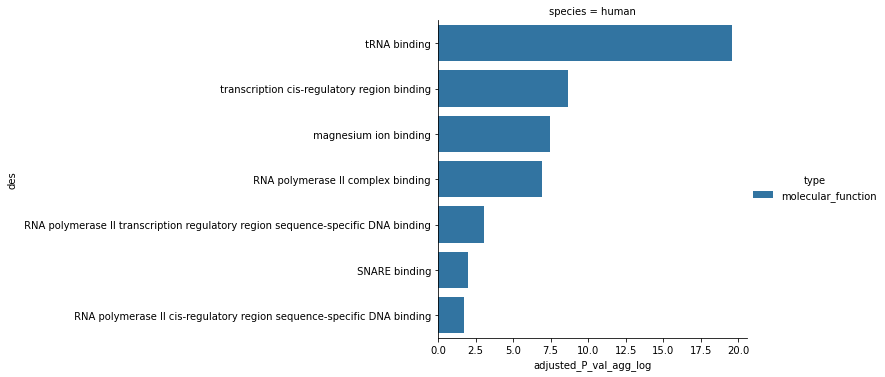

In [268]:
    df_whole = auc_GO_terms_manw_three_list_hic_exp[0]
    df_whole['adjusted_P_val_agg_log'] = [-1*np.log10(x) for x in df_whole['adjusted_P_val_agg']]

    sns.catplot(data=df_whole[(df_whole['adjusted_P_val_agg'] <= 0.05) & (df_whole['type'] == 'molecular_function') ].sort_values(['adjusted_P_val_agg']), y='des', x='adjusted_P_val_agg_log', kind='bar', dodge=False, col='species', hue='type')
    

In [265]:
df_whole[df_whole['adjusted_P_val_agg'] <= 0.05].sort_values(['adjusted_P_val_agg'])

id     P_val_agg     U1_stat  \
7    GO:0000049  1.973265e-22  14578799.5   
25   GO:0000145  2.759376e-21  13597843.0   
107  GO:0000813  3.966106e-20  25053782.5   
19   GO:0000123  1.577409e-19  39334065.0   
44   GO:0000278  1.143080e-16   3798216.5   
111  GO:0000910  5.222560e-14   2929467.5   
18   GO:0000122  3.270652e-12  30212063.5   
115  GO:0000922  3.599578e-12  33510490.5   
21   GO:0000127  1.151096e-10  26936460.5   
123  GO:0000976  1.642788e-10   9087241.5   
108  GO:0000819  2.501466e-10   3565433.5   
73   GO:0000460  4.748136e-10  16288390.5   
35   GO:0000184  8.823532e-10   2435088.5   
48   GO:0000287  3.654952e-09   3405498.0   
9    GO:0000070  4.203481e-09   1783107.5   
41   GO:0000270  6.742679e-09   6659532.5   
74   GO:0000462  1.316268e-08  21385055.0   
128  GO:0000993  1.601444e-08  11055629.5   
97   GO:0000781  2.097905e-08   2100844.0   
55   GO:0000324  2.088409e-08   4031593.5   
94   GO:0000775  2.890585e-08    672270.0   
23   GO:0000137  3.188984e-08   8278395.0   
5    GO:0000041  2.782462e-06  10549650.5   
34   GO:0000178  1.464722e-05  31549176.0   
6    GO:0000045  2.078562e-05  18091039.5   
42   GO:0000271  2.559293e-05   4344442.0   
40   GO:0000266  3.593015e-05   3435841.0   
8    GO:0000054  5.925174e-05   3121007.0   
45   GO:0000279  8.602286e-05   2080091.0   
59   GO:0000346  1.269759e-04  10664554.0   
43   GO:0000276  1.271235e-04   1731737.5   
22   GO:0000132  2.245441e-04  13311060.5   
12   GO:0000077  2.362690e-04   1987916.5   
124  GO:0000977  2.513574e-04   4378936.0   
85   GO:0000724  3.533224e-04   1248653.5   
81   GO:0000502  3.680826e-04   6147807.5   
60   GO:0000347  4.843848e-04   2454491.0   
10   GO:0000075  5.044773e-04   2812308.5   
24   GO:0000139  6.072472e-04  37572374.0   
66   GO:0000398  1.080876e-03    911302.5   
28   GO:0000152  1.300086e-03   6805946.5   
53   GO:0000322  2.764644e-03   2457144.0   
52   GO:0000313  3.064680e-03   2320510.5   
117  GO:0000940  3.297848e-03  13085679.0   
26   GO:0000149  3.518181e-03   6010022.0   
122  GO:0000974  4.056573e-03   1068670.5   
125  GO:0000978  6.592403e-03   1996260.5   
68   GO:0000407  1.109032e-02   1919742.5   

                                                   des                type  \
7                                         tRNA binding  molecular_function   
25                                             exocyst  cellular_component   
107                                    ESCRT I complex  cellular_component   
19                   histone acetyltransferase complex  cellular_component   
44                                  mitotic cell cycle  biological_process   
111                                        cytokinesis  biological_process   
18    negative regulation of transcription by RNA p...  biological_process   
115                                       spindle pole  cellular_component   
21                 transcription factor TFIIIC complex  cellular_component   
123        transcription cis-regulatory region binding  molecular_function   
108                       sister chromatid segregation  biological_process   
73                             maturation of 5.8S rRNA  biological_process   
35    nuclear-transcribed mRNA catabolic process, n...  biological_process   
48                               magnesium ion binding  molecular_function   
9                 mitotic sister chromatid segregation  biological_process   
41                     peptidoglycan metabolic process  biological_process   
74    maturation of SSU-rRNA from tricistronic rRNA...  biological_process   
128                  RNA polymerase II complex binding  molecular_function   
97                        chromosome, telomeric region  cellular_component   
55                                 fungal-type vacuole  cellular_component   
94                      chromosome, centromeric region  cellular_component   
23                                  Golgi cis cisterna  cellular_component   
5            

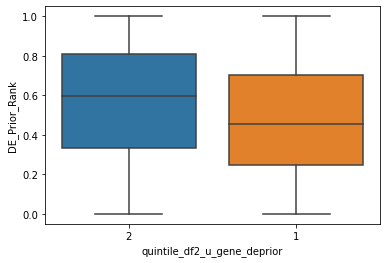

In [253]:
ax = sns.boxplot(data=df2_u_gene_deprior[df2_u_gene_deprior['prior_val']>=0], x='quintile_df2_u_gene_deprior',y='DE_Prior_Rank')



(0.0, 0.009)

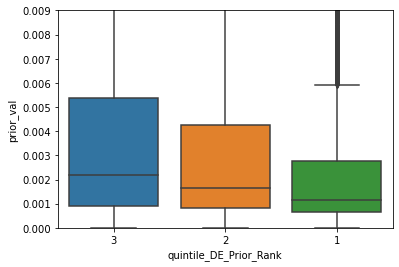

In [257]:
ax = sns.boxplot(data=df2_u_gene_deprior[df2_u_gene_deprior['prior_val']>=0], y='prior_val',x='quintile_DE_Prior_Rank')
ax.set_ylim([0,0.009])


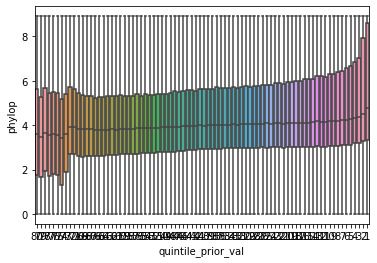

In [204]:
ax = sns.boxplot(data=df2[df2['prior_val']>=0], x='quintile_prior_val',y='phylop')

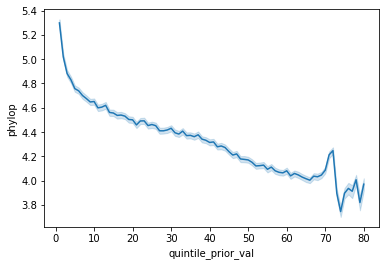

In [209]:
ax = sns.lineplot(data=df2[df2['prior_val']>=0], x='quintile_prior_val',y='phylop')

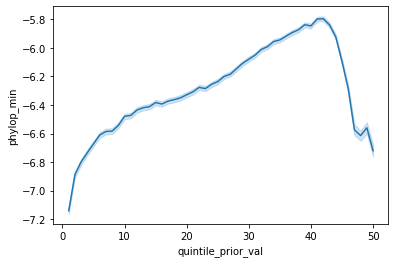

In [218]:
ax = sns.lineplot(data=df2[df2['prior_val']>=0], x='quintile_prior_val',y='phylop_min')

(0.0, 0.06)

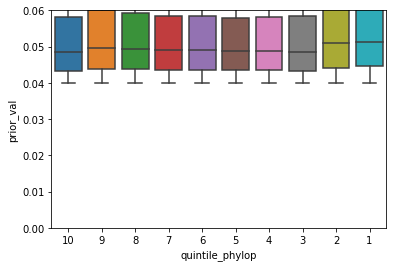

In [190]:
ax = sns.boxplot(data=df2[df2['prior_val']>0.04], y='prior_val',x='quintile_phylop')
ax.set_ylim([0,0.06])

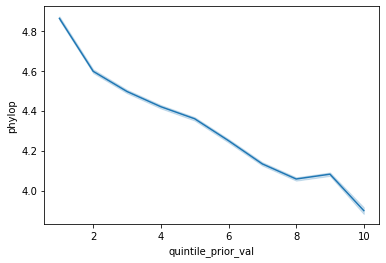

In [181]:
ax = sns.lineplot(data=df2[df2['prior_val']>=0], x='quintile_prior_val',y='phylop')

In [ ]:
ax = sns.boxplot(data=df2[df2['prior_val']>0], x='quintile_prior_val',y='phylop')

KeyboardInterrupt: 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7ffb0b1810d0> (for post_execute):


INFO:root:
Unfortunately, your original traceback can not be constructed.



Traceback (most recent call last):
  File "/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/inspect.py", line 2914, in _bind
    arg_val = next(arg_vals)
StopIteration

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/IPython/core/events.py", line 89, in trigger
    func(*args, **kwargs)
  File "/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/matplotlib/pyplot.py", line 138, in post_execute
    draw_all()
  File "/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/matplotlib/_pylab_helpers.py", line 138, in draw_all
    manager.canvas.draw_idle()
  File "/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site-packages/matplotlib/backend_bases.py", line 2012, in draw_idle
    self.draw(*args, **kwargs)
  File "/grid/gillis/home/lohia/.conda/envs/hicexplorer/lib/python3.8/site

In [132]:
df2[df2['prior_val']>.046].shape

(30288, 13)

In [124]:
df2['prior_val']

0          0.000095
1          0.000048
2          0.000095
3          0.000238
4          0.000000
             ...   
2875007    0.000131
2875008    0.000175
2875009    0.000000
2875010    0.000219
2875011    0.000175
Name: prior_val, Length: 2875012, dtype: float64

In [110]:
np.percentile(df2['prior_val'].values, 99)

0.04675580274000066

In [91]:
%matplotlib inline
import seaborn as sns

<AxesSubplot:xlabel='dist', ylabel='Count'>

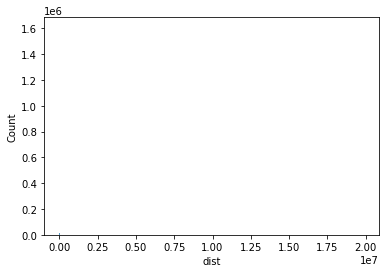

In [95]:
sns.histplot(bins_bed_overlap['dist'], )

In [69]:
bins_bed

chr     start       end  bin_id
0         chr1         0      1000       1
1         chr1      1000      2000       1
2         chr1      2000      3000       1
3         chr1      3000      4000       1
4         chr1      4000      5000       1
...        ...       ...       ...     ...
2875007  chr22  50814000  50815000       1
2875008  chr22  50815000  50816000       1
2875009  chr22  50816000  50817000       1
2875010  chr22  50817000  50818000       1
2875011  chr22  50818000  50818468       1

[2875012 rows x 4 columns]

In [17]:
        gene_data['start_bin'] = gene_data['Start']/resolution_human
        gene_data['start_bin'] = gene_data['start_bin'].astype('int')
        gene_data['start_bin'] = gene_data['start_bin']*resolution_human
        gene_data['end_bin'] = gene_data['End']/resolution_human
        gene_data['end_bin'] = gene_data['end_bin'].astype('int')
        gene_data['end_bin'] = gene_data['end_bin']*resolution_human
        #gene_data['start_bin'] = gene_data['start_bin'].astype('str')

<ipython-input-17-ab58521ca4bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_data['start_bin'] = gene_data['Start']/resolution_human
<ipython-input-17-ab58521ca4bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_data['start_bin'] = gene_data['start_bin'].astype('int')
<ipython-input-17-ab58521ca4bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [18]:
gene_data

Chromosome   Source Feature     Start       End Score Strand Frame  \
0        GL000009.2  ENSEMBL    gene     56139     58376     .      -     .   
8        GL000194.1  ENSEMBL    gene     53589    115018     .      -     .   
20       GL000194.1  ENSEMBL    gene     53593    115055     .      -     .   
34       GL000195.1  ENSEMBL    gene    173871    179372     .      +     .   
48       GL000195.1  ENSEMBL    gene     37433     37534     .      -     .   
...             ...      ...     ...       ...       ...   ...    ...   ...   
2939635        chrY   HAVANA    gene  57015104  57016096     .      -     .   
2939638        chrY   HAVANA    gene  57165511  57165845     .      -     .   
2939641        chrY   HAVANA    gene  57171889  57172769     .      -     .   
2939644        chrY   HAVANA    gene  57201142  57203357     .      -     .   
2939648        chrY   HAVANA    gene  57212183  57214397     .      -     .   

                 gene_id               gene_type  ...  \
0        ENSG00000278704          protein_coding  ...   
8        ENSG00000277400          protein_coding  ...   
20       ENSG00000274847          protein_coding  ...   
34       ENSG00000278198          protein_coding  ...   
48       ENSG00000277428                misc_RNA  ...   
...                  ...                     ...  ...   
2939635  ENSG00000237801    processed_pseudogene  ...   
2939638  ENSG00000228410    processed_pseudogene  ...   
2939641  ENSG00000223484    processed_pseudogene  ...   
2939644  ENSG00000185203               antisense  ...   
2939648  ENSG00000227159  unprocessed_pseudogene  ...   

        transcript_support_level  tag havana_transcript exon_number exon_id  \
0                            NaN  NaN               NaN         NaN     NaN   
8                            NaN  NaN               NaN         NaN     NaN   
20                           NaN  NaN               NaN         NaN     NaN   
34                           NaN  NaN               NaN         NaN     NaN   
48                           NaN  NaN               NaN         NaN     NaN   
...                          ...  ...               ...         ...     ...   
2939635                      NaN  PAR               NaN         NaN     NaN   
2939638                      NaN  PAR               NaN         NaN     NaN   
2939641                      NaN  PAR               NaN         NaN     NaN   
2939644                      NaN  PAR               NaN         NaN     NaN   
2939648                      NaN  PAR               NaN         NaN     NaN   

         ont protein_id ccdsid start_bin   end_bin  
0        NaN        NaN    NaN     56000     58000  
8        NaN        NaN    NaN     53000    115000  
20       NaN        NaN    NaN     53000    115000  
34       NaN        NaN    NaN    173000    179000  
48       NaN        NaN    NaN     37000     37000  
...      ...        ...    ...       ...       ...  
2939635  NaN        NaN    NaN  57015000  57016000  
2939638  NaN        NaN    NaN  57165000  57165000  
2939641  NaN        NaN    NaN  57171000  57172000  
2939644  NaN        NaN    NaN  57201000  57203000  
2939648  NaN        NaN    NaN  57212000  57214000  

[64485 rows x 26 columns]

In [1]:
import pybedtools

a = pybedtools.BedTool('./human_bins_bed.csv')
b = pybedtools.BedTool('./human_genes.csv')
#c = pybedtools.BedTool('c.bed')

In [3]:
intergenic_snps = (a- b)

NotImplementedError: "intersectBed" does not appear to be installed or on the path, so this method is disabled.  Please install a more recent version of BEDTools and re-import to use this method.

In [2]:
intergenic_snps = a.subtract(b)   

NotImplementedError: "subtractBed" does not appear to be installed or on the path, so this method is disabled.  Please install a more recent version of BEDTools and re-import to use this method.

In [ ]:
        input_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/'
        bins_bed = pd.read_csv(f'{input_path}/all_bins.bed', names=['chr', 'start', 'end', 'bin_id'])
        bins_bed['bin_id'] = bins_bed.index
        bins_bed['pos'] = bins_bed['chr'] + '_' + bins_bed['start'].astype('str')

        
        df_cre['start_bin'] = df_cre['start']/resolution_human
        df_cre['start_bin'] = df_cre['start_bin'].astype('int')
        df_cre['start_bin'] = df_cre['start_bin']*resolution_human
        df_cre['start_bin'] = df_cre['start_bin'].astype('str')
        df_cre['start_bin'] = df_cre['chr'] + '_' + df_cre['start_bin']
        #df_cre_1kb_encode = df_cre.drop_duplicates(subset=['start_bin'])
        df_cre['cre'] = 1
        df_cre = df_cre.groupby(['start_bin'])['cre'].sum().reset_index()
        df_cre_1kb_encode = df_cre.merge(bins_bed, left_on='start_bin', right_on='pos')

In [42]:
        input_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/'
        bins_bed = pd.read_csv(f'{input_path}/all_bins.bed', names=['chr', 'start', 'end', 'bin_id'])

In [43]:
bins_bed 

chr     start       end  bin_id
0         chr1         0      1000       1
1         chr1      1000      2000       1
2         chr1      2000      3000       1
3         chr1      3000      4000       1
4         chr1      4000      5000       1
...        ...       ...       ...     ...
2875007  chr22  50814000  50815000       1
2875008  chr22  50815000  50816000       1
2875009  chr22  50816000  50817000       1
2875010  chr22  50817000  50818000       1
2875011  chr22  50818000  50818468       1

[2875012 rows x 4 columns]